In [1]:
import os, sys, png
import numpy as np
from matplotlib import pyplot as plt

from codes.hartmann import read_wavefront_sensor_image_dat, add_no_noise, process_hartmanngram

### Set parameters

In [2]:
data_path = 'data_example_21'

para = {
    'nu_detector': 512,
    'nv_detector': 512,
    'upsampling': 2,
    'grid_period': 20.e-06,
    'dist_mask_to_detector': 0.2,
    'lowest_fringe_order': 8,
    'centroid_power': 1.7,
    'detector_pixel_size': 1.48e-06,
    'wavelength': 1.0972e-10,
}

### Process `data_example_21/ex21_res_int_pr_se.dat`

Calculating slopes from the hartmanngram...calculating the wrapped phase...phase unwrapping...checking fringe orders...calculating centroids and slopes...assembling the centroids and slopes...completed (lasted 7.472402 s)
Aberration = λ/43.0 RMS
Strehl ratio (Mahajan's approximation) = 0.9789


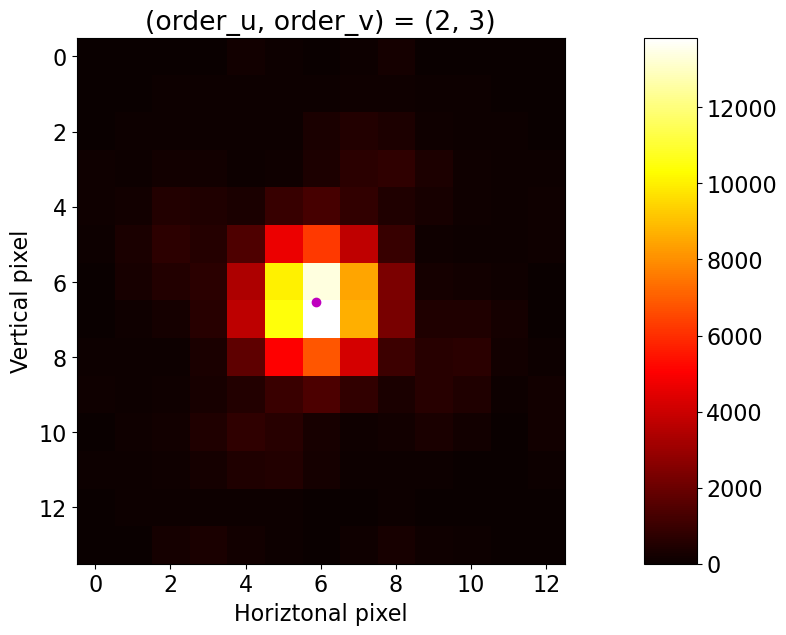

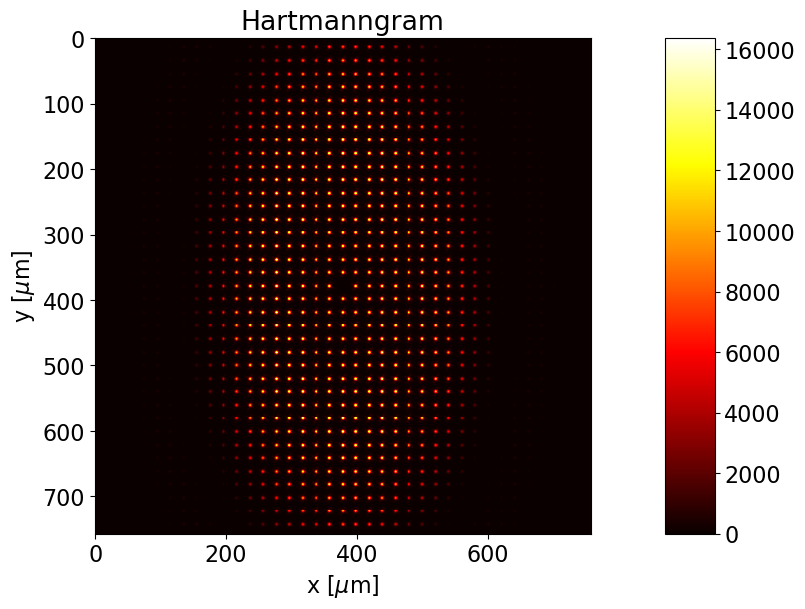

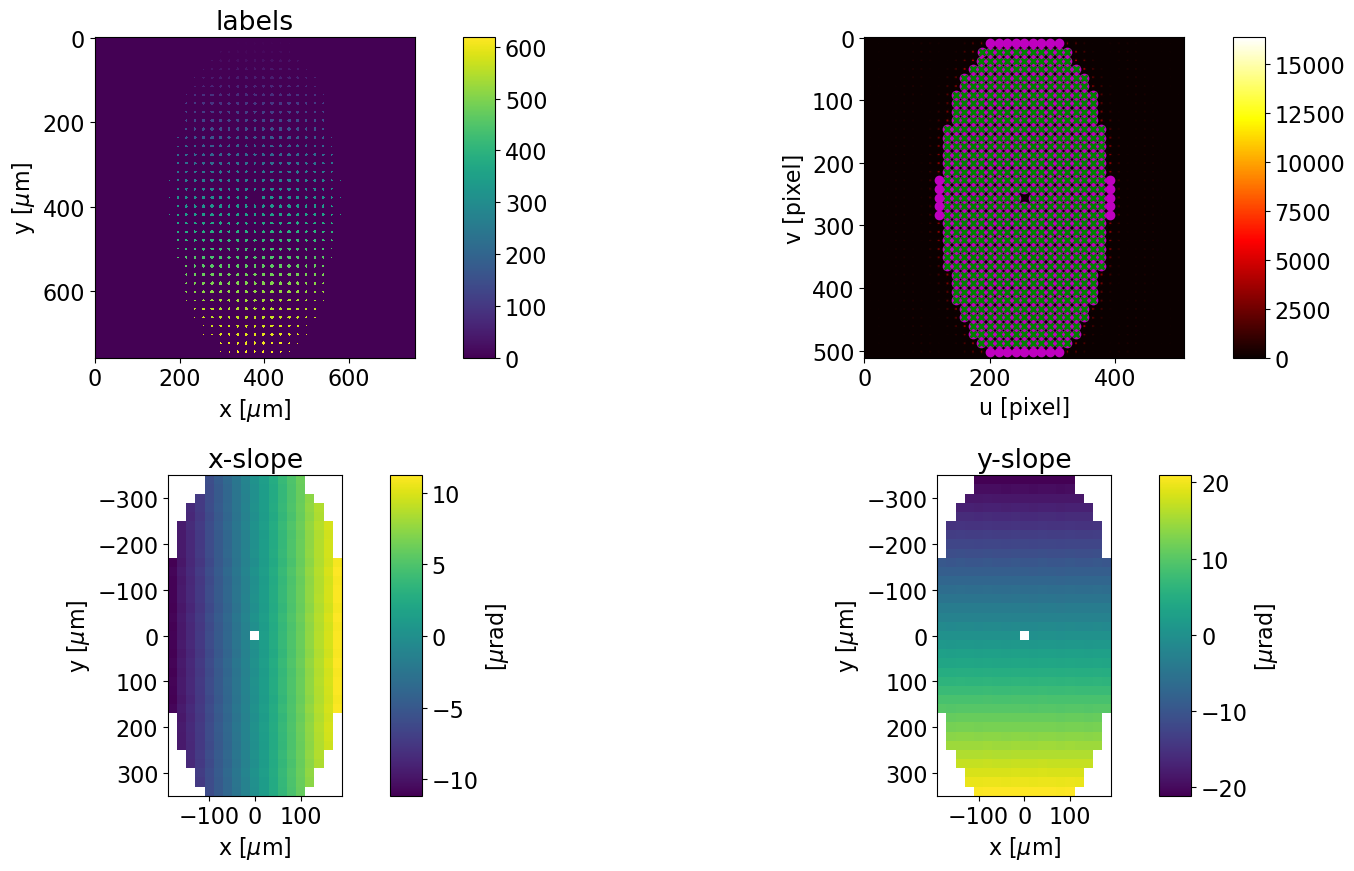

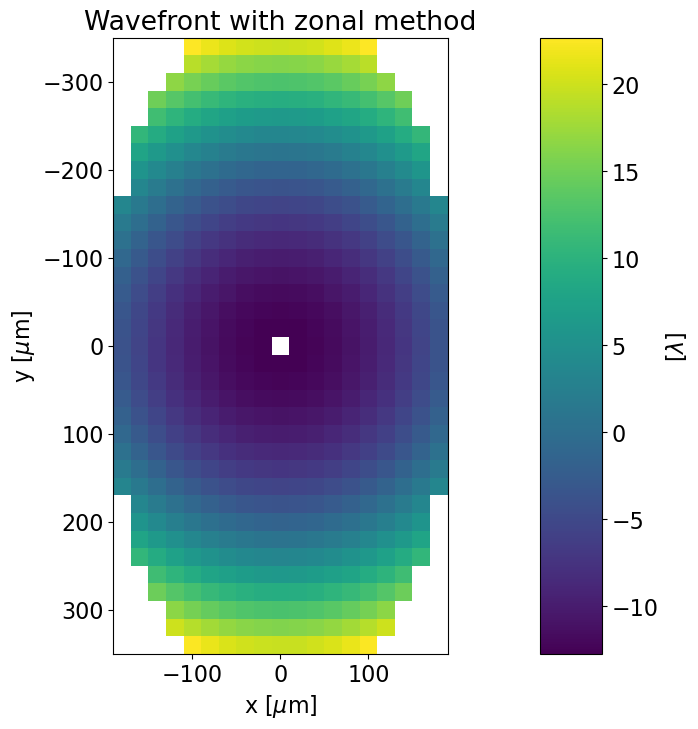

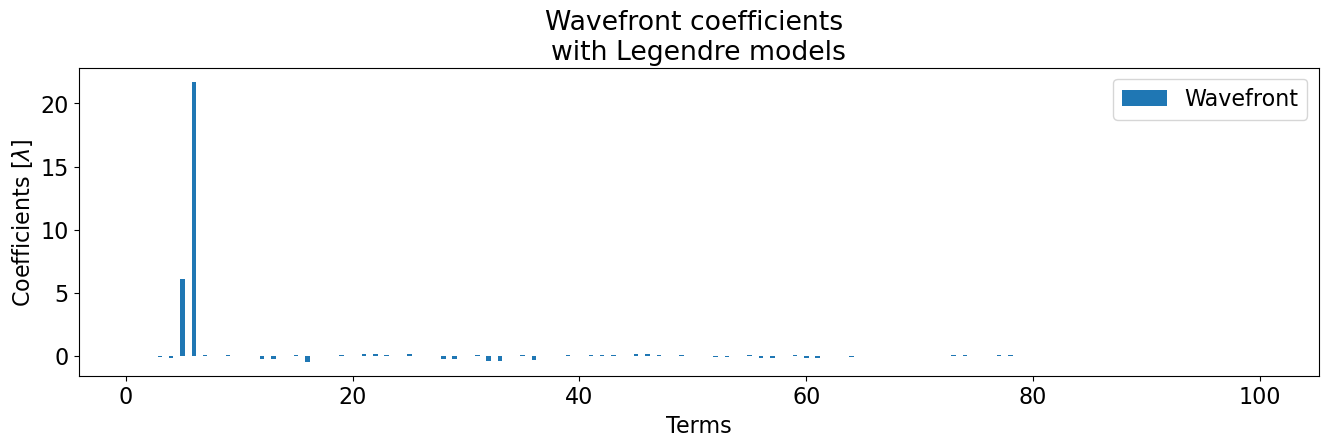

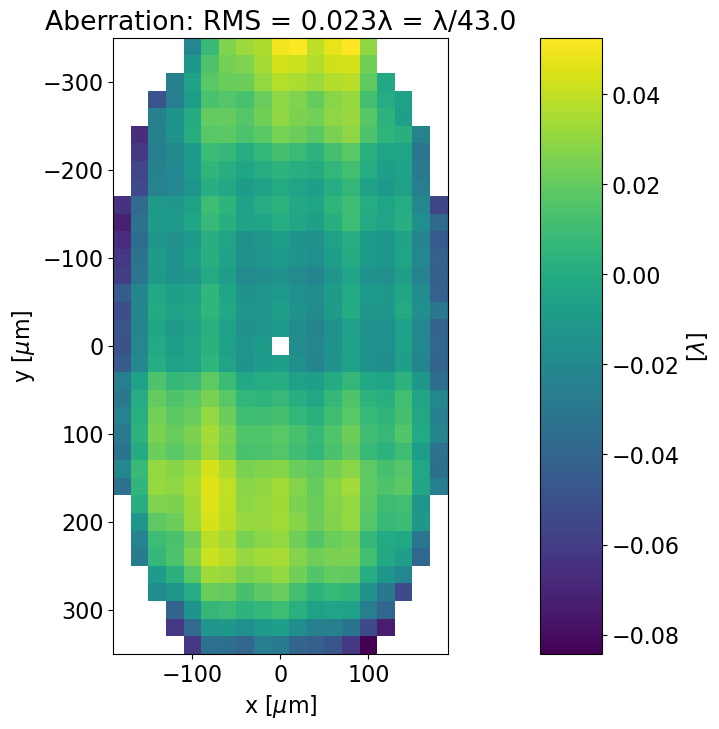

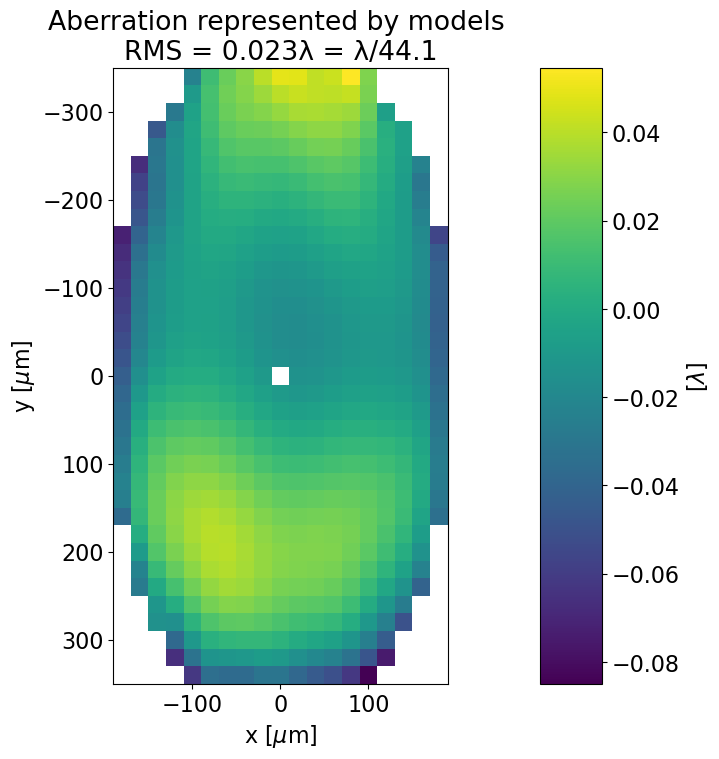

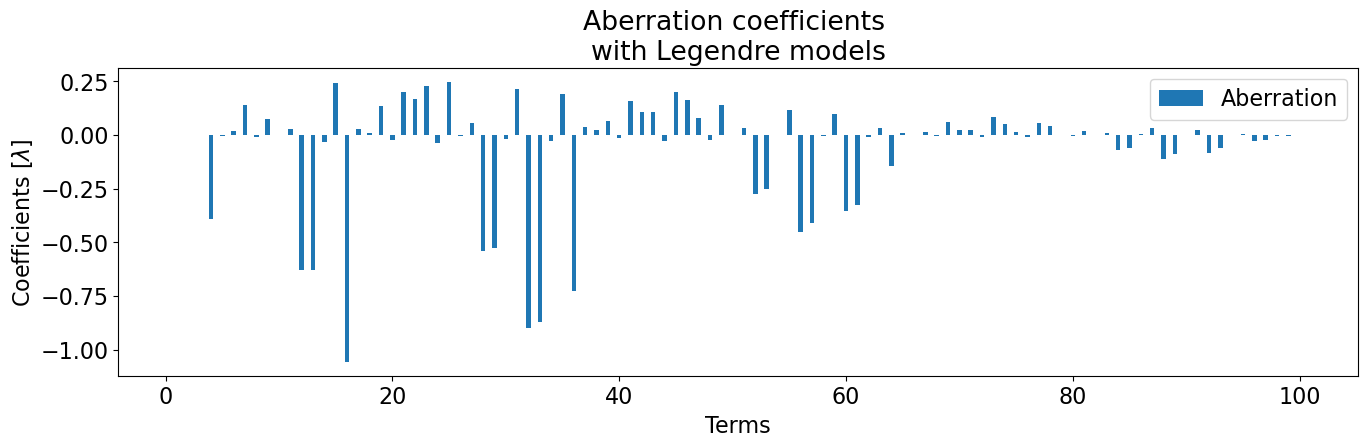

In [3]:
# Read the Hartmanngram
hartmanngram_fn = 'ex21_res_int_pr_se.dat'
para['hartmanngram_filename'] = os.path.join(data_path, hartmanngram_fn)

intensity_map = read_wavefront_sensor_image_dat(para['hartmanngram_filename'],
                                                para['nu_detector'],
                                                para['nv_detector'],
                                                para['upsampling'],
                                                )
hartmanngram = add_no_noise(intensity_map)

# Use pypng to write a grayscale PNG.
hartmanngram_png_fn = hartmanngram_fn + '.png'
png_fn = os.path.join(data_path, hartmanngram_png_fn)
with open(png_fn, 'wb') as f:
    writer = png.Writer(width=hartmanngram.shape[1],
                        height=hartmanngram.shape[0], 
                        bitdepth=14, 
                        greyscale=True)
    writer.write(f, hartmanngram.tolist())
starting_pixel = np.array([para['nu_detector']/2,
                           para['nv_detector']/2]).astype(int)
wfr, x2d, y2d, abr, coefs_wfr_wl, coefs_abr_wl, denominator, strehl_ratio = \
    process_hartmanngram(para,
                         hartmanngram,
                         starting_pixel=starting_pixel,
                         thresholding_mode='otsu',
                         )
plt.show()
